In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [ ]:
data = pd.read_excel('iris.xlsx')

In [ ]:
data1 = data.iloc[:269,:]
data2 = data1.copy()
data2.dropna(inplace=True)


In [ ]:
data2.reset_index(drop=True)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5,3.6,1.4,0.2,0.0
...,...,...,...,...,...
130,6.7,3.0,5.2,2.3,2.0
131,6.3,2.5,5.0,1.9,2.0
132,6.5,3.0,5.2,2.0,2.0
133,6.2,3.4,5.4,2.3,2.0


In [ ]:
data2.columns

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width',
       'Species'],
      dtype='object')

In [ ]:
new_data = data.iloc[269:,:]

In [ ]:
new_data2 = new_data.iloc[:,:4].dropna().reset_index(drop=True)

In [ ]:
 data2.iloc[:,0] = data2.iloc[:,0].astype(float)

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


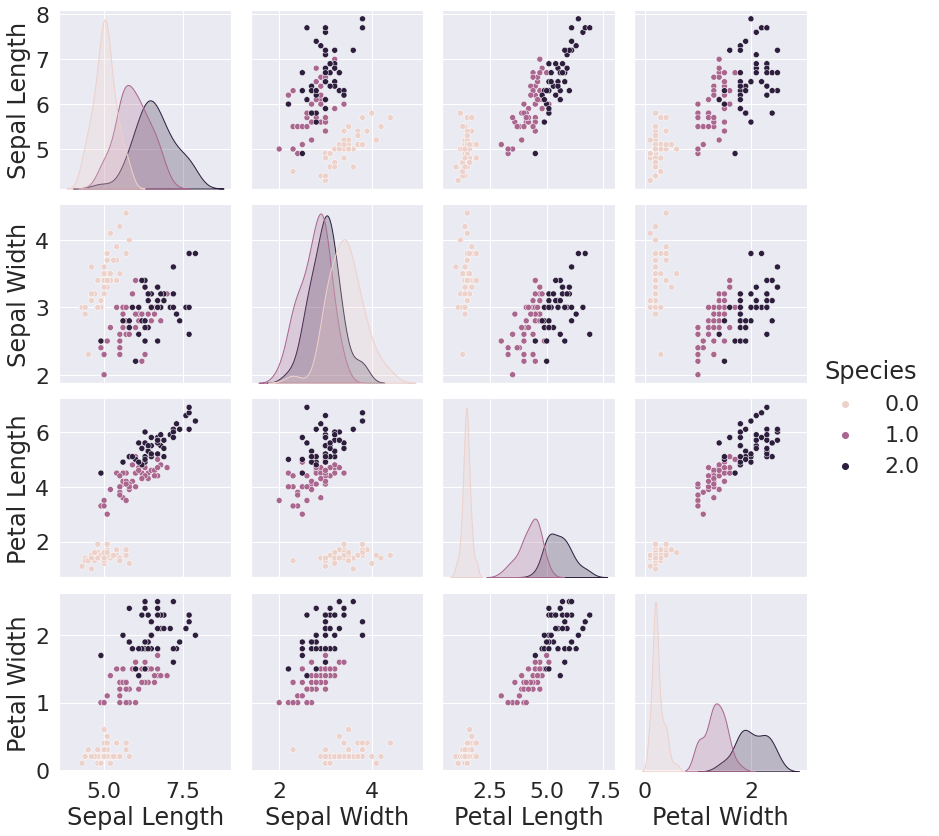

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 2)
sns.set_color_codes(palette='deep')
#Plot the dataset
sns.pairplot(data2, hue="Species", size=3)#, diag_kind="kde")
plt.show()

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 268
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  135 non-null    float64
 1   Sepal Width   135 non-null    float64
 2   Petal Length  135 non-null    float64
 3   Petal Width   135 non-null    float64
 4   Species       135 non-null    float64
dtypes: float64(5)
memory usage: 6.3 KB


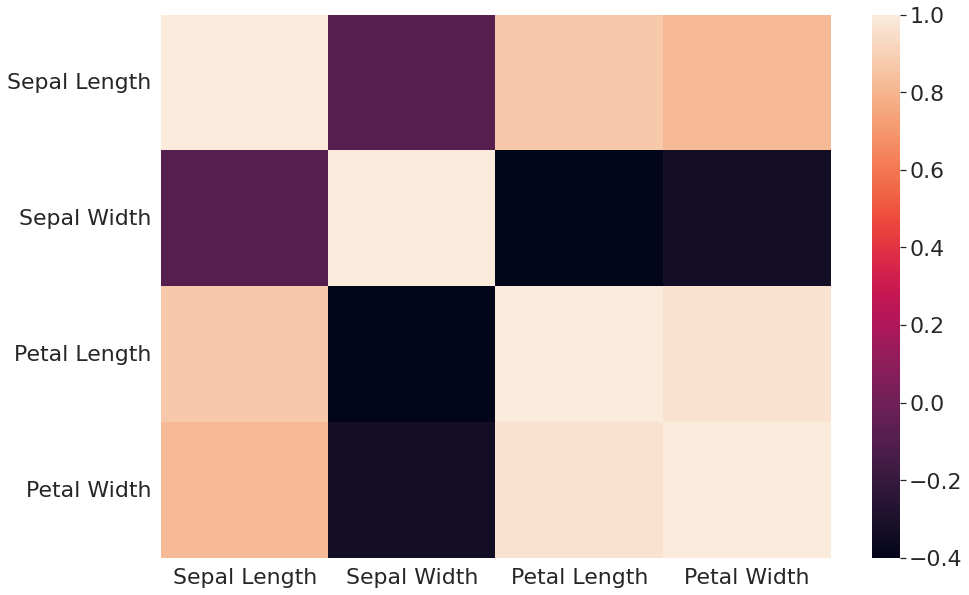

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data2.iloc[:,:4].corr())
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.preprocessing import normalize
FEATURES = data2.columns[0:4]
X = data2[FEATURES].values


from sklearn.preprocessing import LabelBinarizer
species_lb = LabelBinarizer()
Y = species_lb.fit_transform(data2.Species.values)


# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

In [ ]:
Y_test.shape

(68, 3)

In [ ]:
#Scaling new data
x2 = new_data2.values
scaler = StandardScaler()
x2_scaled = scaler.fit_transform(x2)
x2_scaled

array([[-1.34003322,  1.22406336, -1.30912302, -1.20062158],
       [-0.04701871, -0.14615682,  0.27998585,  0.20635683],
       [-0.86984612,  0.12788722, -1.19561524, -1.34131942],
       [-1.57512676,  0.67597529, -1.36587691, -1.34131942],
       [ 1.36354257,  0.40193125,  0.67726306,  0.48775252],
       [-0.39965903,  2.59428354, -1.36587691, -1.05992374],
       [-0.16456548, -1.24233296,  0.10972418, -0.07503885],
       [ 0.7758087 , -0.42020085,  1.07454028,  1.4726374 ],
       [ 0.42316838, -0.42020085,  0.16647807,  0.20635683],
       [-0.28211226, -1.516377  , -0.00378359, -0.21573669],
       [ 0.65826193, -0.14615682,  1.07454028,  0.90984604],
       [-0.04701871, -1.24233296,  0.73401695,  1.19124172],
       [-1.10493967,  0.40193125, -1.19561524, -1.34131942],
       [ 2.30391676, -0.42020085,  1.69883305,  1.19124172],
       [ 0.30562161,  0.12788722,  0.62050918,  0.90984604]])

In [ ]:
Y_test.shape

(68, 3)

In [ ]:
n_features

4

In [ ]:
model = Sequential()
model.add(Dense(8,input_shape=(4,), activation='relu'))
#model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='sigmoid'))




In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train,Y_train,
          batch_size=5, epochs=50,
          verbose=0,validation_data=(X_test,Y_test))

In [ ]:
test_loss, test_acc = model.evaluate(X_test,Y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.3068 - accuracy: 0.8971


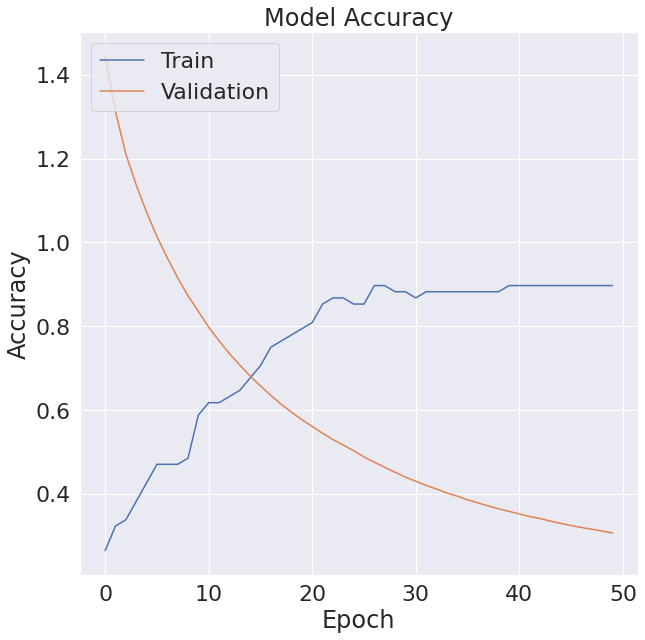

In [ ]:
import keras
from matplotlib import pyplot as plt
#tes_history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
#al_acc =
plt.figure(figsize=(10, 10))
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


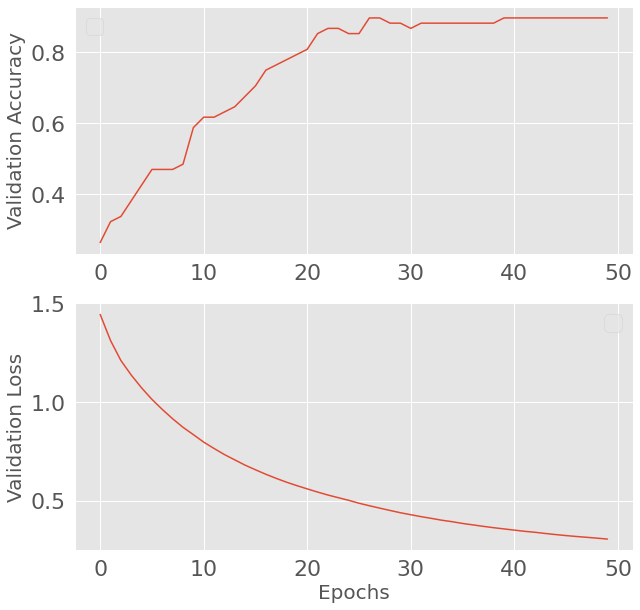

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10))

#for model_name in history_dict:
#val_accuracy = history_dict[model_nuracy')

#val_loss = history_dict[model_name][0].history['val_loss']
ax1.plot(history.history['val_accuracy'])
ax2.plot(history.history['val_loss'])
#plt.legend(
ax1.set_ylabel('Validation Accuracy',fontsize=20)
ax2.set_ylabel('Validation Loss',fontsize=20)

ax2.set_xlabel('Epochs',fontsize=20)
ax1.legend()
ax2.legend();

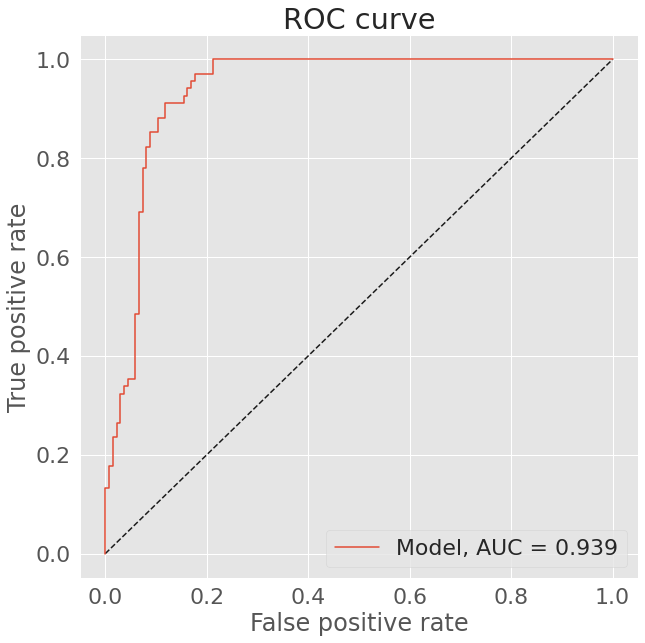

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20})

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')



Y_pred = model.predict(X_test)
fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())

plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format('Model', auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [ ]:
data2[-68:]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
134,6.6,3.0,4.4,1.4,1.0
136,6.8,2.8,4.8,1.4,1.0
138,6.7,3.0,5.0,1.7,1.0
140,6.0,2.9,4.5,1.5,1.0
142,5.7,2.6,3.5,1.0,1.0
...,...,...,...,...,...
260,6.7,3.0,5.2,2.3,2.0
262,6.3,2.5,5.0,1.9,2.0
264,6.5,3.0,5.2,2.0,2.0
266,6.2,3.4,5.4,2.3,2.0


In [ ]:
Y_train

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [ ]:
# report performance
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(Y_train[-67:], Y_test[-67:]))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
#pyplot.plot(raw_values[-12:])
#pyplot.plot(Y_test)
#pyplot.show()


Test RMSE: 0.639


In [ ]:
#Making Predictions on New data
predictions = model.predict(x2_scaled)
predictions

array([[0.81770605, 0.04742968, 0.02459207],
       [0.3025754 , 0.687407  , 0.54056585],
       [0.6679175 , 0.22552133, 0.08254838],
       [0.8295045 , 0.05173373, 0.02868867],
       [0.09298167, 0.771472  , 0.87426496],
       [0.7828295 , 0.04488984, 0.02121904],
       [0.25121135, 0.755074  , 0.4140992 ],
       [0.12166524, 0.6100554 , 0.8583579 ],
       [0.18819726, 0.7333567 , 0.6154061 ],
       [0.24142945, 0.7821655 , 0.39397645],
       [0.1376982 , 0.6921174 , 0.8167989 ],
       [0.20237315, 0.6058687 , 0.6210187 ],
       [0.7427869 , 0.12769559, 0.05914503],
       [0.02066118, 0.8264911 , 0.96818525],
       [0.22524184, 0.6258501 , 0.72530687]], dtype=float32)

In [ ]:
#transform probabilities to flower species
classes_x = np.argmax(predictions,axis=1)
classes_x

array([0, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2, 2, 0, 2, 2])

In [ ]:
flowers = pd.DataFrame(classes_x, columns = ['Flowers_Predictions'])
flowers

,Flowers_Predictions
0,0
1,1
2,0
3,0
4,2
5,0
6,1
7,2
8,1
9,1


In [ ]:
!pip install plotly_express

In [ ]:
x_new = pd.DataFrame(x2)
x_new

,0,1,2,3
0,4.6,3.4,1.4,0.3
1,5.7,2.9,4.2,1.3
2,5,3.0,1.6,0.2
3,4.4,3.2,1.3,0.2
4,6.9,3.1,4.9,1.5
5,5.4,3.9,1.3,0.4
6,5.6,2.5,3.9,1.1
7,6.4,2.8,5.6,2.2
8,6.1,2.8,4.0,1.3
9,5.5,2.4,3.7,1.0


In [ ]:
flowers

,Flowers_Predictions
0,0
1,1
2,0
3,0
4,2
5,0
6,1
7,2
8,1
9,1


In [ ]:
pred_merged = pd.concat([x_new,flowers],axis=1)

In [ ]:
pred_merged.columns = data2.columns
pred_merged

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,4.6,3.4,1.4,0.3,0
1,5.7,2.9,4.2,1.3,1
2,5,3.0,1.6,0.2,0
3,4.4,3.2,1.3,0.2,0
4,6.9,3.1,4.9,1.5,2
5,5.4,3.9,1.3,0.4,0
6,5.6,2.5,3.9,1.1,1
7,6.4,2.8,5.6,2.2,2
8,6.1,2.8,4.0,1.3,1
9,5.5,2.4,3.7,1.0,1


In [ ]:
final_new = pd.concat([data2, pred_merged])

In [ ]:
final_new

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,0.0
2,4.9,3.0,1.4,0.2,0.0
4,4.7,3.2,1.3,0.2,0.0
6,4.6,3.1,1.5,0.2,0.0
8,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
10,6.3,2.9,5.6,1.8,2.0
11,5.7,2.5,5.0,2.0,2.0
12,4.8,3.1,1.6,0.2,0.0
13,7.7,2.8,6.7,2.0,2.0


In [ ]:
final_new.iloc[:,0] = final_new.iloc[:,0].astype(float)

In [ ]:
import plotly_express as px

px.scatter_3d(data2, x="Petal Length", y="Petal Width", z="Sepal Width", size="Sepal Length",
              color="Species", color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"pink"})

In [ ]:
import plotly_express as px

px.scatter_3d(final_new, x="Petal Length", y="Petal Width", z="Sepal Width", size="Sepal Length",
              color="Species", color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"pink"})